# Assumptions of linear regression:

There are a few assumptions made on the data before we fit the linear regression model on it. These assumptions if True cement the fact that the data is linear or somewhat linear in its distribution and linear models like linear regression can be applied on it. 

Applying linear regression on non linear data can result in wrong estimation about the values of the coef and the intercept.

Generally there are 5 assumtions of linear regression:   
1. Linearity between the dependent and the independent columns.
2. Normality of residuals.
3. Heteroscedasticity(constant variance) of residuals.
4. No multicollinearity among the independent columns.
5. No autocorrelation among the residuals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression


----

## Linearity:

The first assumtion is for checking the linearity between the independent and the dependent variables.  

Models like linear regression can only be applied if the data is linearly separable and cannot be applied on non-linear data.  
Applying LR on non-linear data will give erroneous values of the parameter estimates and also wrong inference about the data itself.



In [21]:
# check linearity through scatter plots

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,-2.720524,-1.861893,11.582331
1,0.480624,-2.598521,7.052042
2,-2.405877,2.485961,14.312348
3,-1.968275,1.542167,9.773038
4,-1.977316,2.128558,8.651338
...,...,...,...
95,3.165271,0.959746,14.402500
96,1.063348,1.307888,6.492140
97,1.126566,2.418076,9.587568
98,3.336575,0.221617,13.697556


In [26]:
# checking for linearity using the F test in OLS

import statsmodels.api as sm

# separate the X and y from the df

X = df.drop(columns='y')
y = df['y']

# add constant term to X
X = sm.add_constant(X)

# fit the ols model
ols = sm.OLS(endog=y,exog=X)
results = ols.fit()

# print the summary 
print(results.summary())

# print the f test results

print('The results of the F test are:')
print(results.fvalue,results.f_pvalue)

if results.f_pvalue <= 0.05:
    print('Reject the null hypothesis, The data is non-linear')
else:
    print('Fail to reject the null hypothesis, The data is linear')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     35.39
Date:                Thu, 25 May 2023   Prob (F-statistic):           2.87e-12
Time:                        13:52:49   Log-Likelihood:                -311.57
No. Observations:                 100   AIC:                             629.1
Df Residuals:                      97   BIC:                             637.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2855      0.634     14.646      0.0

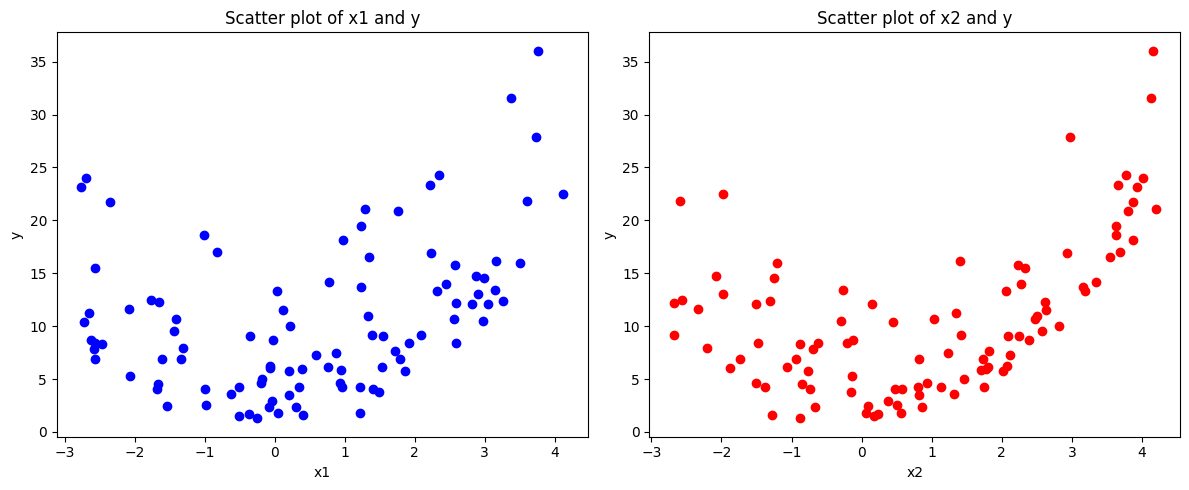

In [3]:
# Create a new figure and define subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

- The scatter plot clearly shows the non-linearity of the data.

In [4]:
X = df.drop(columns='y')
y = df['y']

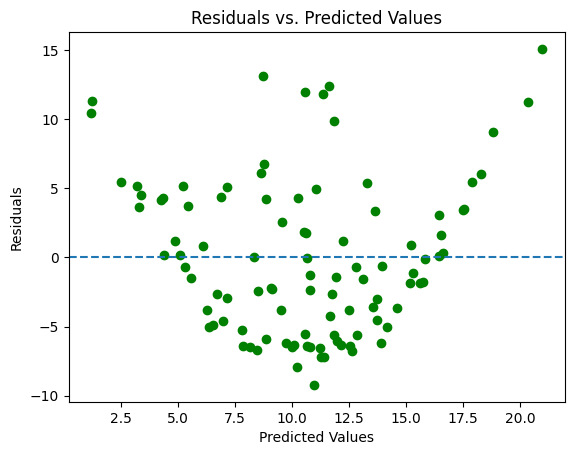

In [5]:
# create residual plot

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit the model
lr.fit(X,y)

# do predictions
y_pred = lr.predict(X)

# calculate residuals
resid = y - y_pred

# make a residual plot
plt.scatter(y_pred,resid,color='green')
plt.axhline(y=0,linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- The spread of the residuals is non-uniform in nature and forms a curve shape. This shows that the data lacks homoscedasticity and is heteroscedastic in nature.

In [6]:
# fit polynomial terms on the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()

# fit the model
lr.fit(X,y)

# do predictions
y_pred = lr.predict(X)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y,y_pred))

The r2 score for linear regression is 0.36249430702598007


In [7]:
# generate polynomial features

poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)

lr_poly = LinearRegression()

# fit the model
lr_poly.fit(X_poly,y)

# do predictions
y_pred = lr_poly.predict(X_poly)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y,y_pred))

The r2 score for linear regression is 0.9800594756230339


In [8]:
# find the correct degree of polynomial

scores = {}

for i in range(2,11):
    # generate polynomial features

    poly = PolynomialFeatures(degree=i)

    X_poly = poly.fit_transform(X)

    lr_poly = LinearRegression()

    # fit the model
    lr_poly.fit(X_poly,y)

    # do predictions
    y_pred = lr_poly.predict(X_poly)

    # calculate the r2 score
    score = r2_score(y,y_pred)

    scores[f'{i}'] = score

pd.DataFrame(scores,index=['scores']).T.sort_values(by='scores',ascending=False)

,scores
9,0.990533
7,0.986734
5,0.983896
4,0.981746
3,0.980059
2,0.978765
10,0.948273
6,0.941503
8,0.815811


#### Remedies

The r2 score for linear regression is 0.9007887768060907
The r2 score for linear regression is 0.9290590339678223


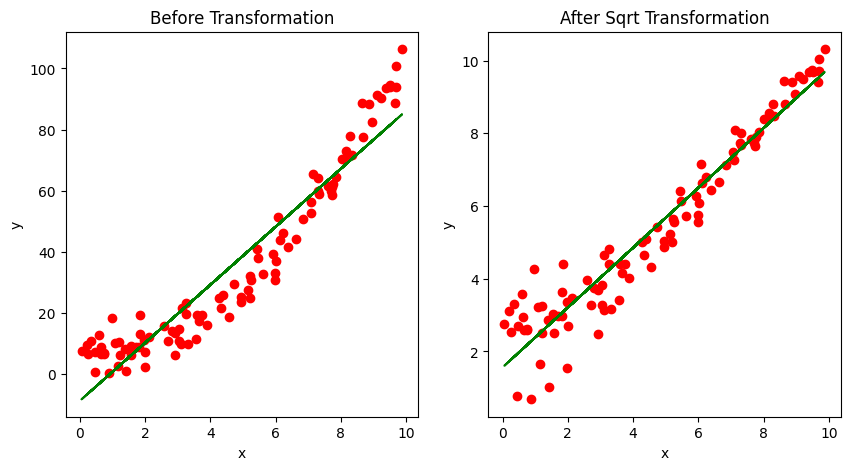

In [9]:
# apply transformations on data

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
X = 10 * np.random.rand(100, 1)
y = X**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# sqrt transformation on y
y_sqrt = np.sqrt(y)

# fit linear regression before transformation
lr = LinearRegression()

# fit the model
lr.fit(X,y)

# do predictions
y_pred = lr.predict(X)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y,y_pred))

# fit linear regression after transformation
lr_trans = LinearRegression()

# fit the model
lr_trans.fit(X,y_sqrt)

# do predictions
y_pred_trans = lr_trans.predict(X)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y_sqrt,y_pred_trans))

# plot the models
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# before transformation
ax1.scatter(X,y,color='red')
ax1.plot(X,y_pred,color='green')
ax1.set_title('Before Transformation')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


# before transformation
ax2.scatter(X,y_sqrt,color='red')
ax2.plot(X,y_pred_trans,color='green')
ax2.set_title('After Sqrt Transformation')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

The r2 score for linear regression is 0.9007887768060907
The r2 score for linear regression is 0.9782386269447243


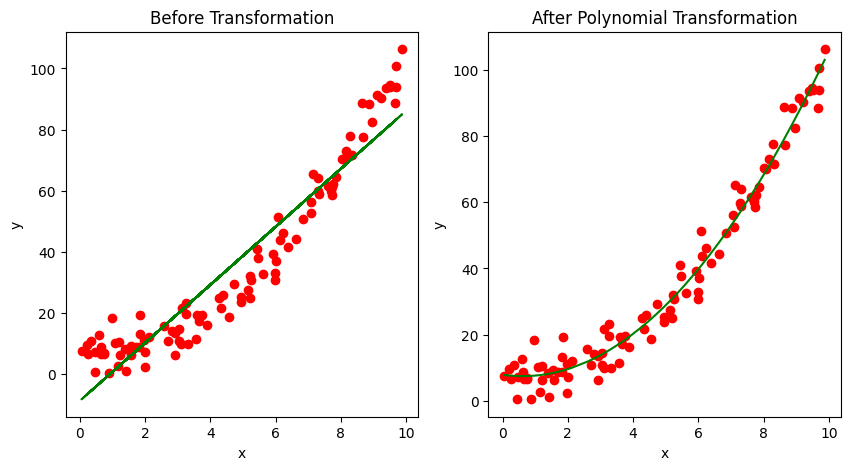

In [10]:
# fit polynomial data

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
X = 10 * np.random.rand(100, 1)
y = X**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# fit linear regression before transformation
lr = LinearRegression()

# fit the model
lr.fit(X,y)

# do predictions
y_pred = lr.predict(X)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y,y_pred))

# fit polynomial
poly = PolynomialFeatures(degree=2)

# transform the data
X_poly = poly.fit_transform(X)

# fit linear regression after transformation
lr_poly = LinearRegression()

# fit the model
lr_poly.fit(X_poly,y)

# do predictions
y_pred_poly = lr_poly.predict(X_poly)

# calculate the r2 score
print('The r2 score for linear regression is',r2_score(y,y_pred_poly))

# plot the models
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# Before transformation
ax1.scatter(X,y,color='red')
ax1.plot(X,y_pred,color='green')
ax1.set_title('Before Transformation')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


# After transformation
ax2.scatter(X,y,color='red')
ax2.plot(sorted(X[:,0]),y_pred_poly[np.argsort(X[:, 0])],color='green')
ax2.set_title('After Polynomial Transformation')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

-------

## Normality of residuals:

The second assumtion is to check if the residuals are normally distributed or not.    
The second assumption holds true only when the residuals are normally distributed.

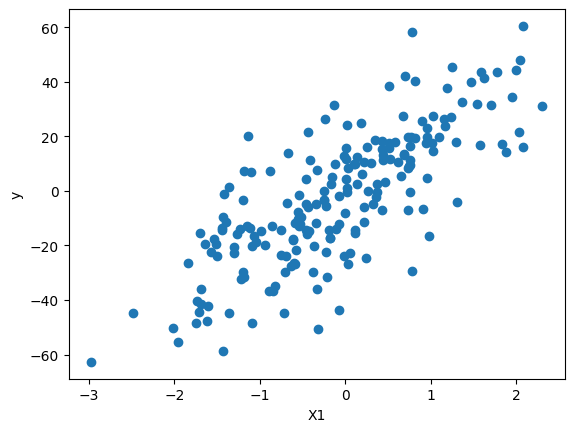

In [11]:
# make regression data

X,y = make_regression(n_samples=200,n_features=1,
                      n_informative=1,noise=15,
                      random_state=100)

# plot the data
plt.scatter(X[:,0],y)
plt.ylabel('y')
plt.xlabel('X1')
plt.show()

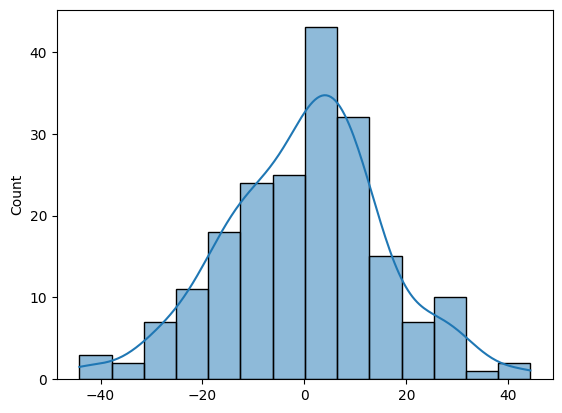

In [12]:
# calculate the residuals using linear regression

lr = LinearRegression()

# fit the model
lr.fit(X,y)

# predict on the data
y_pred = lr.predict(X)

# calculate the residuals
resid = y - y_pred

# plot the histogram and kde plot for the residuals

sns.histplot(resid,kde=True)
plt.show()

In [13]:
# calculate the mean and std of residuals

print('The mean of residuals is',resid.mean())
print('The std of reiduals is',resid.std())

The mean of residuals is 2.1316282072803005e-16
The std of reiduals is 15.514936578645369


- The distribution of the residuals appears normally distributed.

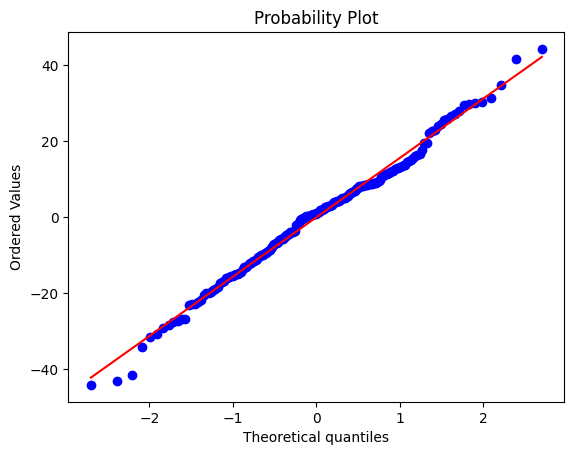

In [14]:
# plot QQ plot to confirm

from scipy.stats import probplot

probplot(resid,dist='norm',plot=plt)
plt.show()

In [15]:
# do hypothesis testing

from scipy.stats import shapiro

stat,p_value = shapiro(resid.ravel())

if p_value <= 0.05:
    print('Reject the null hypothesis. The data is not normally distributed')
else:
    print('Fail to reject the null hypothesis. The data is normally distributed')

print(stat,p_value)

Fail to reject the null hypothesis. The data is normally distributed
0.9921425580978394 0.35732996463775635


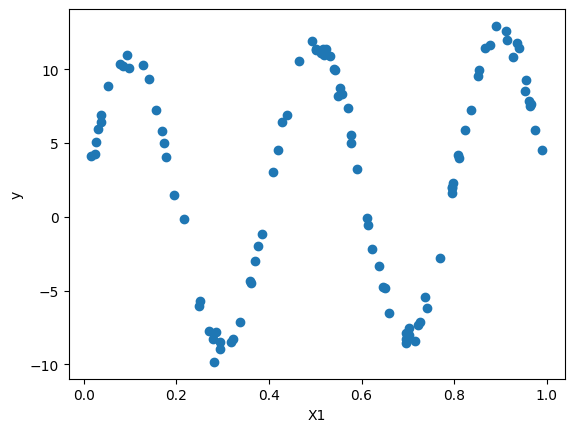

In [16]:
# Generate a synthetic dataset with a non-normal distribution
X = np.random.rand(100, 1)
y = np.exp(X) + 10*np.sin(5*np.pi*X) + np.random.normal(0, 0.5, (100, 1))

# plot the data
plt.scatter(X[:,0],y)
plt.ylabel('y')
plt.xlabel('X1')
plt.show()

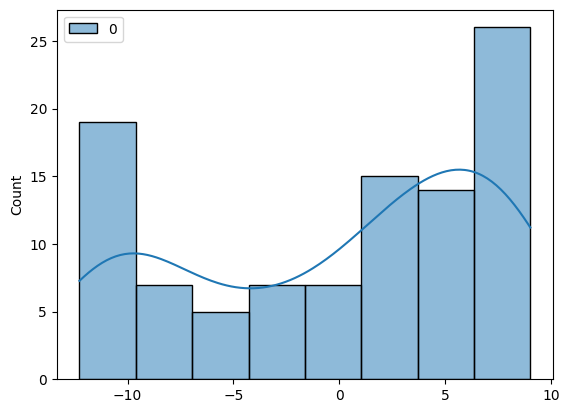

In [17]:
# calculate the residuals using linear regression

lr = LinearRegression()

# fit the model
lr.fit(X,y)

# predict on the data
y_pred = lr.predict(X)

# calculate the residuals
resid = y - y_pred

# plot the histogram and kde plot for the residuals

sns.histplot(resid,kde=True)
plt.show()

In [18]:
print(resid.shape)

(100, 1)


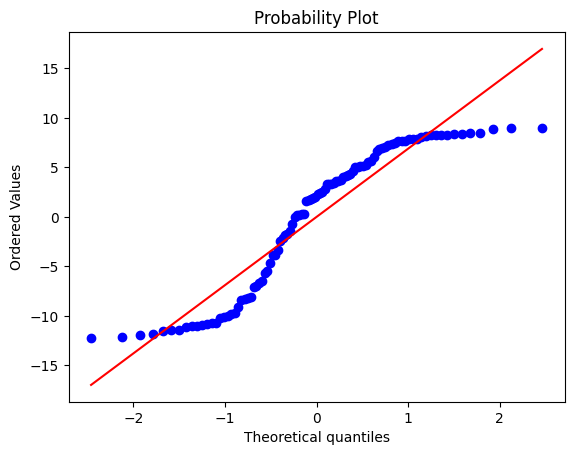

In [19]:
# plot QQ plot to confirm

from scipy.stats import probplot

probplot(resid.ravel(),dist='norm',plot=plt)
plt.show()

In [20]:
# do hypothesis testing

from scipy.stats import shapiro

stat,p_value = shapiro(resid.ravel())

if p_value <= 0.05:
    print('Reject the null hypothesis. The data is not normally distributed')
else:
    print('Fail to reject the null hypothesis. The data is normally distributed')

print(stat,p_value)

Reject the null hypothesis. The data is not normally distributed
0.8868208527565002 3.5684897170540353e-07


----

## Homoscedasticity:
The term homoscedasticity means constant variance.     
Linear regression can only be applied where the residual or the error terms show constant variance around the mean.

If the variance in not constant (**Heterosedasticity**), then applying linear models can give wrong estimates about the parameters.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

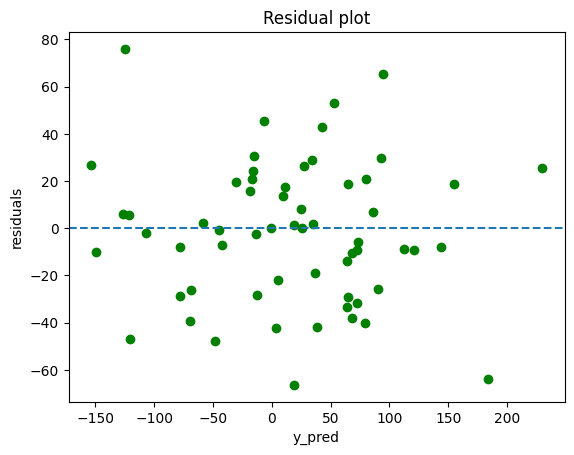

In [32]:
# generate synthetic data

X,y = make_regression(n_samples=300,n_features=3,
                      n_informative=3,noise=30,
                      random_state=765)

# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=76)

# fit a regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

# calculate the predictions
y_pred = lr.predict(X_test)

# calculate the residual terms
resid = y_test - y_pred

# plot the residual to create a residual plot

plt.scatter(y_pred,resid,color='green')
plt.axhline(y=0,linestyle='--')
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.show()


- No particular pattern is forming in the residual plot which shows homoscedasticity of residuals.

-----

## Multicollinearity among input columns:
For linear regression to hold true there should be no multicollinearity among the input columns.

The term multicollinearity means that there is a strong linear relationship between the input columns and also that the variance of one input column can be explained by other input columns.

- To get rid of multicollinearity it is best to remove one of the columns that is showing signs of multicollinearity

> The result of multicollinearity is:    
1. Inflated standard error values.
2. Unrealiable and unstable values of coef estimates.

- The unstability comes from the fact that if only a single value in the data is changed, it results in drastic changes of the value of estimates.

In [36]:
# generate data

X,y = make_regression(n_samples=300,n_features=3,
                      n_informative=3,noise=30,
                      random_state=765)

# make df of X
X = pd.DataFrame(X,columns=['X1','X2','X3'])

# create a column showing multicollinearity
X['X4'] = X['X1'] + (5 * X['X3']) + np.random.normal(size=(X.shape[0],))

,X1,X2,X3,X4
0,-0.957940,1.522751,-0.535990,-2.661740
1,0.160955,0.365221,-0.503004,-2.384181
2,-0.976246,0.475029,-0.389312,-2.663589
3,1.207751,-0.477150,0.338569,3.693650
4,-1.200142,-1.102053,0.663577,3.345496
...,...,...,...,...
295,-0.336773,-2.084023,0.444573,0.962960
296,-1.352954,-0.747970,-0.727219,-4.485229
297,0.576481,0.390376,-0.451029,-0.810819
298,0.085213,-1.065272,1.331055,6.362401


In [37]:
# add constant term to X
X = sm.add_constant(X)

# fit the ols model
ols = sm.OLS(endog=y,exog=X)
results = ols.fit()

# print the summary 
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     777.4
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.83e-155
Time:                        14:28:04   Log-Likelihood:                -1438.5
No. Observations:                 300   AIC:                             2887.
Df Residuals:                     295   BIC:                             2905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2487      1.710      1.900      0.0

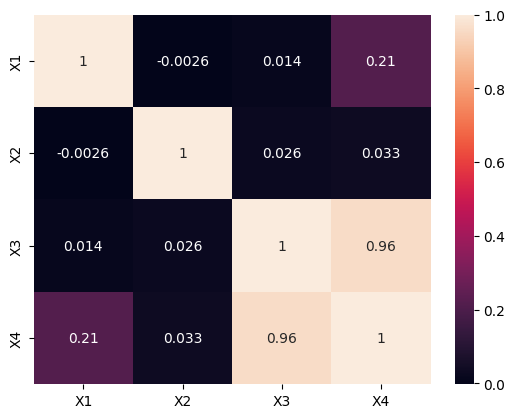

In [39]:
# correlation matrix

import seaborn as sns

# plot the heatmap
sns.heatmap(X.drop(columns='const').corr(),annot=True)
plt.show()

- The column `X4` shows very high correlation (close to 1) with the column `X3`.

In [44]:
# check through VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X.drop(columns='const')
vif = []

for col_no in range(len(X.columns)):
    val = variance_inflation_factor(X,col_no)
    vif.append(val)

vif

[2.0359367907933903, 1.0024852554320036, 24.66862281811061, 25.814197169492928]

In [45]:
# print results as a df
pd.DataFrame(vif,index=[col for col in X.columns],columns=['vif'])

,vif
X1,2.035937
X2,1.002485
X3,24.668623
X4,25.814197


- Columns `X3` and `X4` shows high VIF values greater than 5.

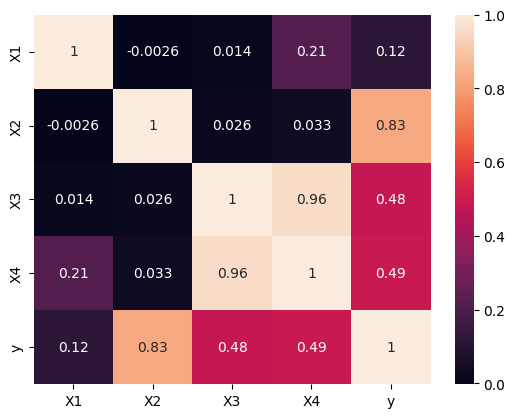

In [49]:
y = pd.Series(y,name='y')

# create a temp df
temp_df = pd.concat([X,y],axis=1)
temp_df

# # plot the heatmap
sns.heatmap(temp_df.corr(),annot=True)
plt.show()

The column `X4` shoes higher correlation than the column `X3` and `X3` can be dropped to reduce multicollinearity.

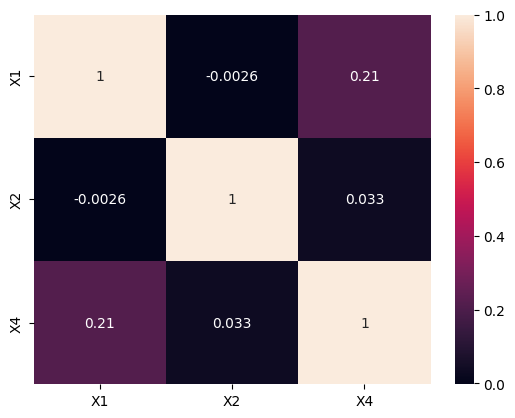

,vif
X1,1.046125
X2,1.001113
X4,1.047204


In [52]:
# drop X3 
X = X.drop(columns=['X3'])

## plot the heatmap
sns.heatmap(X.corr(),annot=True)
plt.show()

# check through VIF
vif = []

for col_no in range(len(X.columns)):
    val = variance_inflation_factor(X,col_no)
    vif.append(val)

# print results as a df
pd.DataFrame(vif,index=[col for col in X.columns],columns=['vif'])

- The VIF value close to 1 shows that there is no multicollinearity in the data.

In [53]:
# add constant term to X
X = sm.add_constant(X)

# fit the ols model
ols = sm.OLS(endog=y,exog=X)
results_new = ols.fit()

# print the old summary with multicollinearity
print(results.summary())

print('#' * 70)

# print the new summary without multicollinearity 
print(results_new.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     777.4
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.83e-155
Time:                        14:45:23   Log-Likelihood:                -1438.5
No. Observations:                 300   AIC:                             2887.
Df Residuals:                     295   BIC:                             2905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2487      1.710      1.900      0.0

- The results after removing multicollinearity shows smaller values of standard errors.

- The results also shows reduced condition number, which is also a signed of reduced multicollinearity in the data.

In [55]:
# print the condition numbers

print('The condition number with multicollinearity is',np.round(results.condition_number,2))

print('The condition number without multicollinearity is',np.round(results_new.condition_number,2))

The condition number with multicollinearity is 27.61
The condition number without multicollinearity is 5.26


-------

## No autocorrelation of residuals:
The residuals should not be autocorrelated to each other.

The graph of residuals should not show any specific pattern.

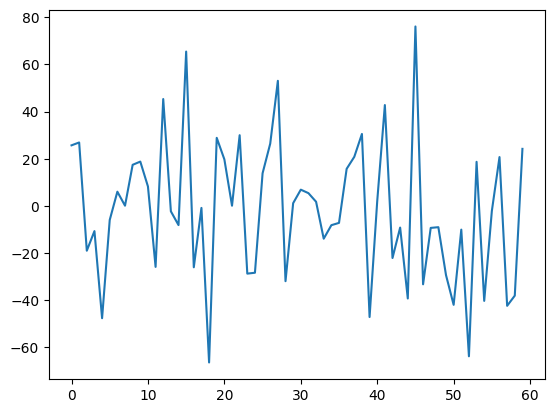

In [58]:
# generate data

X,y = make_regression(n_samples=300,n_features=3,
                      n_informative=3,noise=30,
                      random_state=765)


# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=76)

# fit a regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

# calculate the predictions
y_pred = lr.predict(X_test)

# calculate the residual terms
resid = y_test - y_pred

# plot the residuals
plt.plot(resid)
plt.show()

- The graph does not show a specific pattern which clearly shows that there is no autocorrelation of residuals.

In [64]:
# Generate a synthetic dataset with a non-normal distribution
X = np.random.rand(100, 1)
y = np.exp(X) + 10*np.sin(5*np.pi*X) + np.random.normal(0, 0.5, (100, 1))


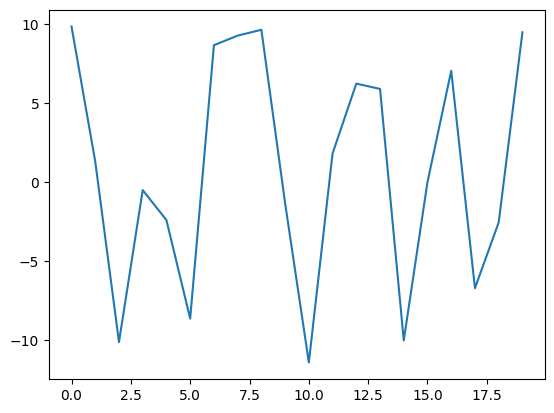

In [65]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=76)

# fit a regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

# calculate the predictions
y_pred = lr.predict(X_test)

# calculate the residual terms
resid = y_test - y_pred

# plot the residuals
plt.plot(resid)
plt.show()

- There is a pattern in this graph.   
This shows that linear models cannot be applied on such data.